In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df["TotalCharges"].unique()[0:10]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

In [24]:
df["TotalCharges"].replace(" ", pd.NA, inplace=True)

In [25]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [26]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df["ChurnBinary"] = df["Churn"].map({"No": 0, "Yes": 1})

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

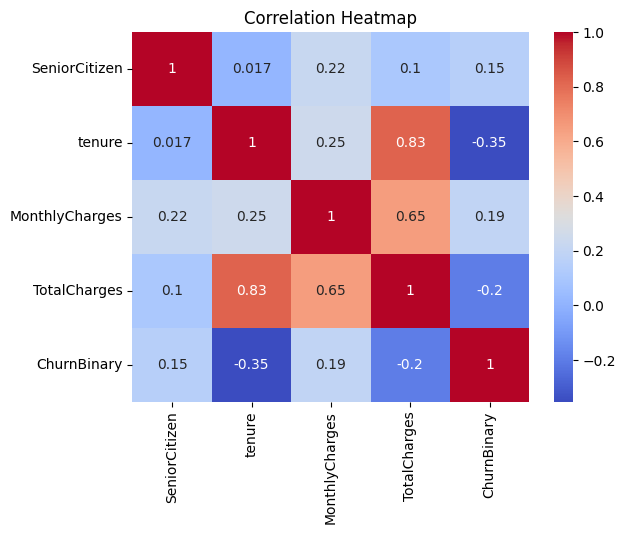

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
df.groupby("Churn")["Contract"].value_counts(normalize=True)

Churn  Contract      
No     Month-to-month    0.429068
       Two year          0.318322
       One year          0.252609
Yes    Month-to-month    0.885500
       One year          0.088818
       Two year          0.025682
Name: proportion, dtype: float64

In [33]:
df.groupby("Churn")["InternetService"].value_counts(normalize=True)

Churn  InternetService
No     DSL                0.379204
       Fiber optic        0.347700
       No                 0.273096
Yes    Fiber optic        0.693954
       DSL                0.245586
       No                 0.060460
Name: proportion, dtype: float64

In [34]:
df.groupby("Churn")["PaymentMethod"].value_counts(normalize=True)

Churn  PaymentMethod            
No     Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
Yes    Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: proportion, dtype: float64

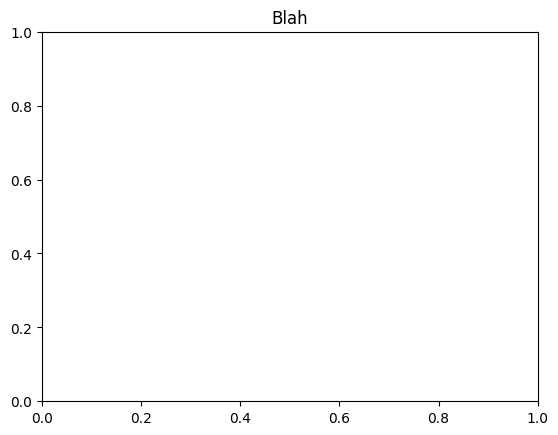

In [35]:
plt.title("Blah")
plt.show()

In [36]:
df.corr(numeric_only=True)["ChurnBinary"].sort_values(ascending=False)

ChurnBinary       1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: ChurnBinary, dtype: float64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

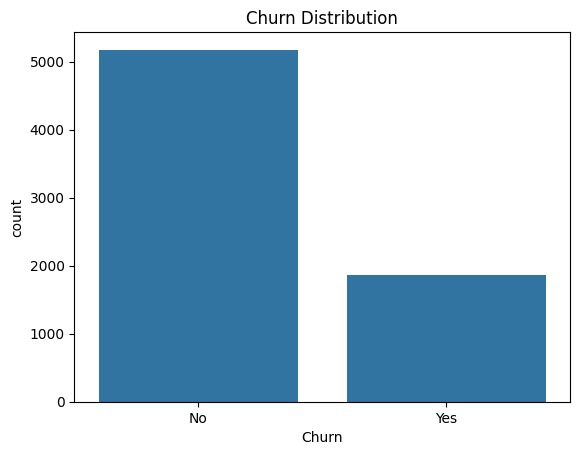

In [38]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [39]:
print(df['Churn'].value_counts(normalize=True) * 100)


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


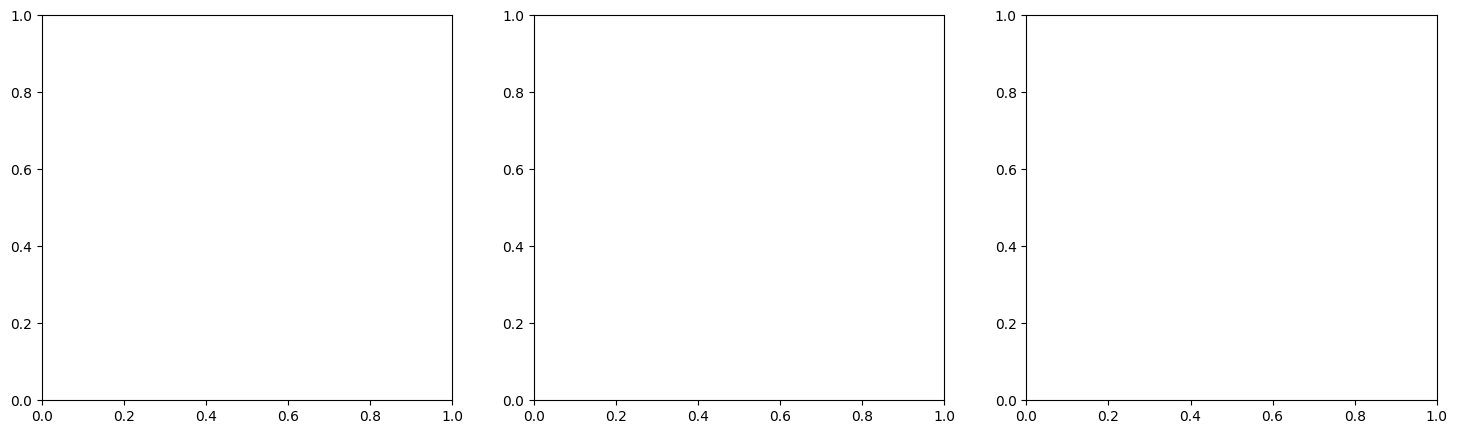

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

In [41]:
sns.countplot(data=df, x='gender', hue='Churn', ax=axes[0])

<Axes: xlabel='gender', ylabel='count'>

In [42]:
axes[0].set_title('Churn by Gender')

Text(0.5, 1.0, 'Churn by Gender')

In [43]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1])
axes[1].set_title('Churn by Senior Citizen')

Text(0.5, 1.0, 'Churn by Senior Citizen')

In [44]:
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[2])
axes[2].set_title('Churn by Partner')

Text(0.5, 1.0, 'Churn by Partner')

In [45]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

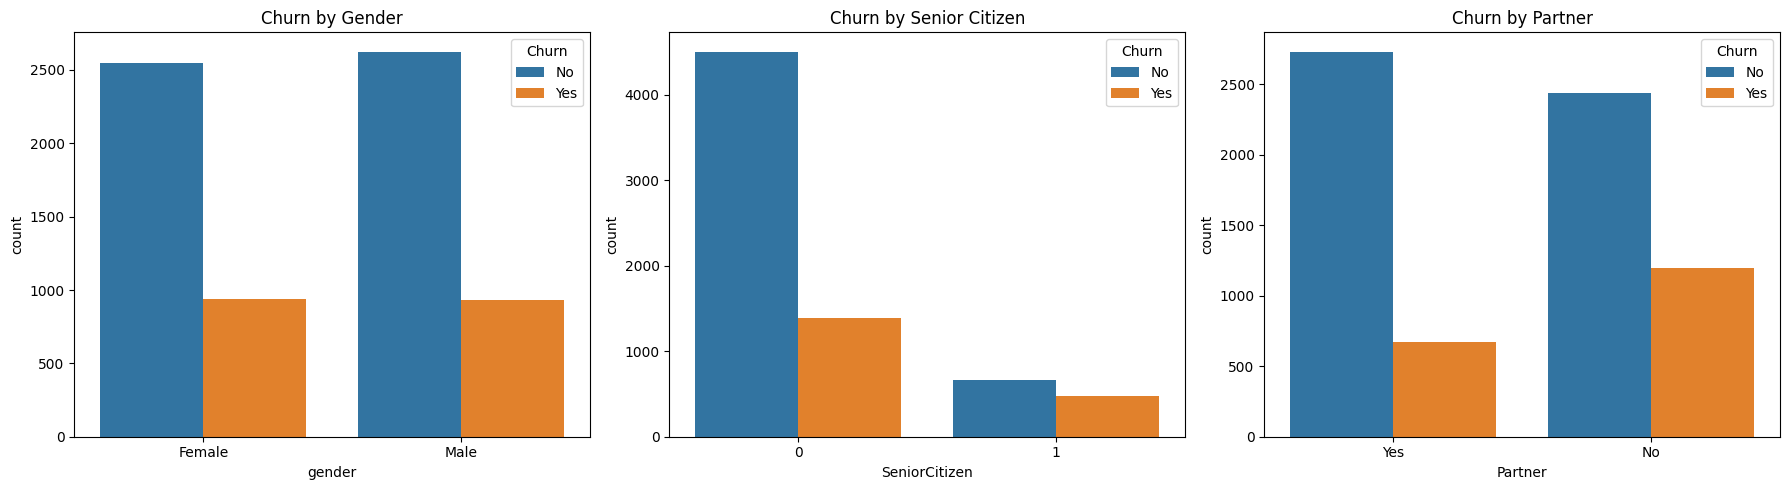

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='gender', hue='Churn', ax=axes[0])
axes[0].set_title('Churn by Gender')

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1])
axes[1].set_title('Churn by Senior Citizen')

sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[2])
axes[2].set_title('Churn by Partner')

plt.tight_layout()
plt.show()

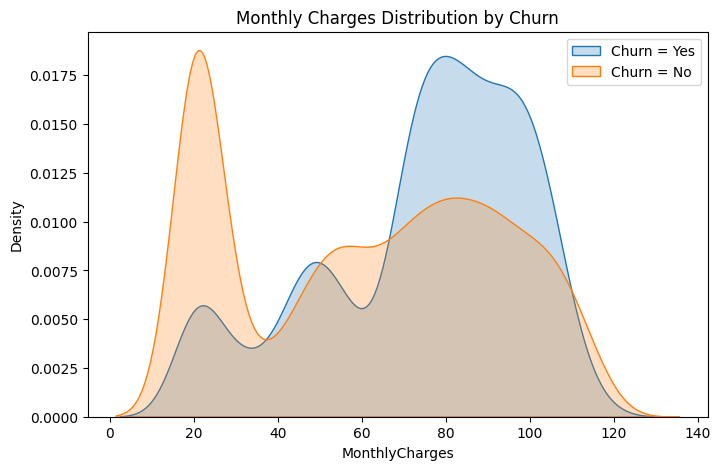

In [47]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Churn"]=="Yes"]["MonthlyCharges"], label="Churn = Yes", fill=True)
sns.kdeplot(df[df["Churn"]=="No"]["MonthlyCharges"], label="Churn = No", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.legend()
plt.show()

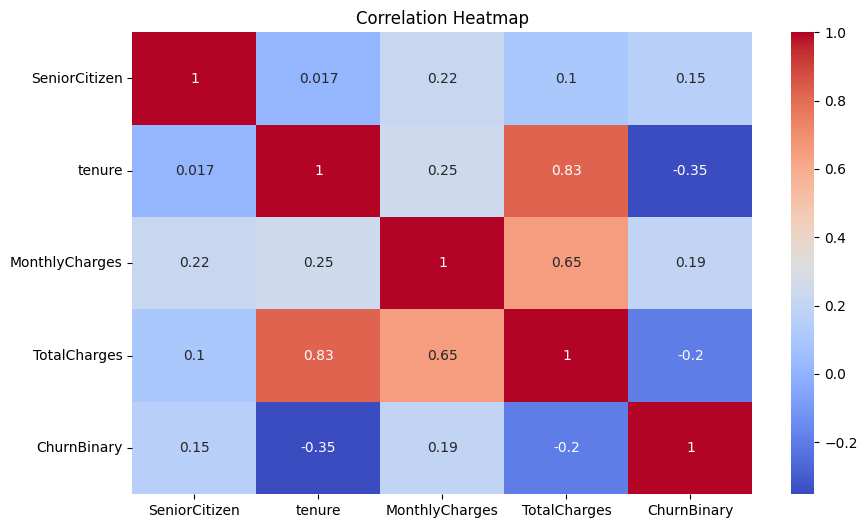

In [48]:
df["ChurnBinary"] = df["Churn"].map({"No": 0, "Yes": 1})

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [49]:
df.corr(numeric_only=True)["ChurnBinary"].sort_values(ascending=False)


ChurnBinary       1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: ChurnBinary, dtype: float64

In [50]:
df = df.drop(["customerID", "Churn"], axis=1) 

In [51]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [52]:
X = df_encoded.drop("ChurnBinary", axis=1)
y = df_encoded["ChurnBinary"]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8183108587650816

Confusion Matrix:
 [[935 101]
 [155 218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
rf_pred = rf_model.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7892122072391767

Confusion Matrix:
 [[941  95]
 [202 171]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



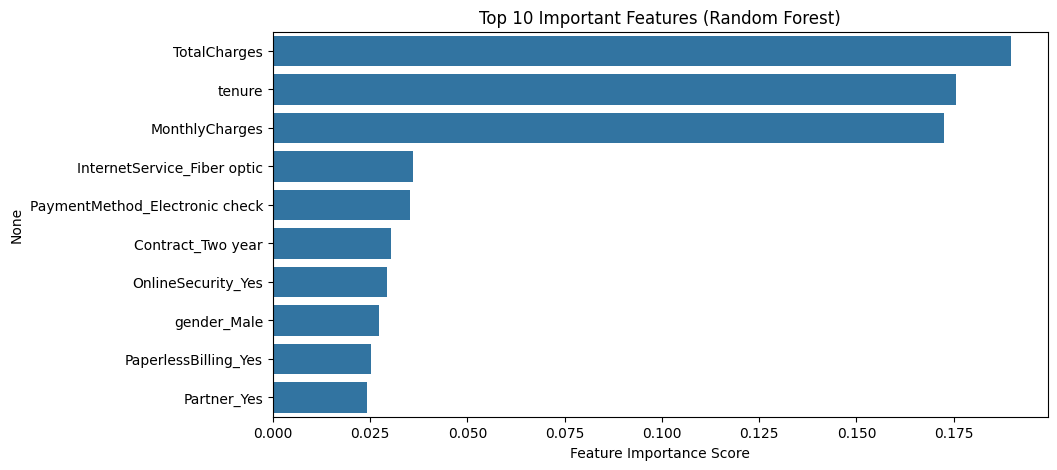

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.show()


In [66]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [67]:
from xgboost import XGBClassifier

In [69]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [70]:
xgb_pred = xgb_model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.7984386089425124

Confusion Matrix:
 [[925 111]
 [173 200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [72]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [73]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4138, 1: 4138}


In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [76]:
rf_smote_pred = rf_smote_model.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("SMOTE + Random Forest Accuracy:", accuracy_score(y_test, rf_smote_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_smote_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_smote_pred))


SMOTE + Random Forest Accuracy: 0.78708303761533

Confusion Matrix:
 [[897 139]
 [161 212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.60      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [78]:
import joblib
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']